In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [353]:
train = pd.read_csv("Dataset/train.csv")
test = pd.read_csv("Dataset/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [61]:
numericCols = train.drop(["Id", "SalePrice"], axis = 1).select_dtypes(exclude = ["object"]).columns
print(numericCols)
objCols =  train.select_dtypes(include = ["object"]).columns
print(objCols)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'Centra

In [6]:
len(train.columns)

81

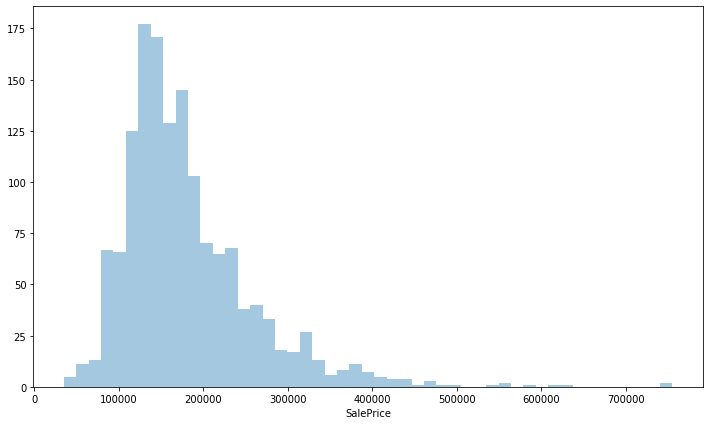

In [13]:
plt.figure(figsize = (12, 7))
sns.distplot(train["SalePrice"], kde = False)

In [29]:
corr = train.corr().loc["SalePrice"].drop("SalePrice")
corrCols = corr[(corr >= 0.5) | (corr <= -0.5)].index
corrCols

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'],
      dtype='object')

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


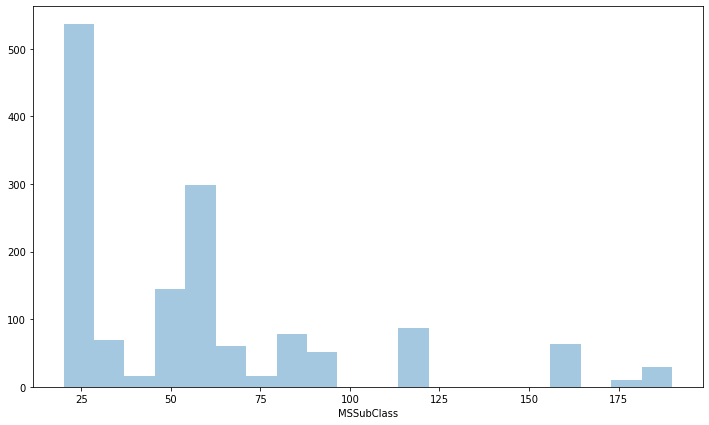

<Figure size 1080x504 with 0 Axes>

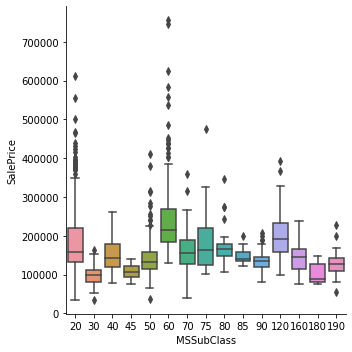

In [63]:
print(train["MSSubClass"].value_counts())
plt.figure(figsize = (12, 7))
sns.distplot(train["MSSubClass"], kde = False)

plt.figure(figsize = (15, 7))
sns.catplot(x = "MSSubClass", y = "SalePrice", kind = "box", data = train)

In [36]:
lotFrontage = "LotFrontage"
salePrice = "SalePrice"

In [354]:
train[lotFrontage].fillna(train[lotFrontage].mean(), inplace = True)

In [366]:
test[lotFrontage].fillna(test[lotFrontage].mean(), inplace = True)

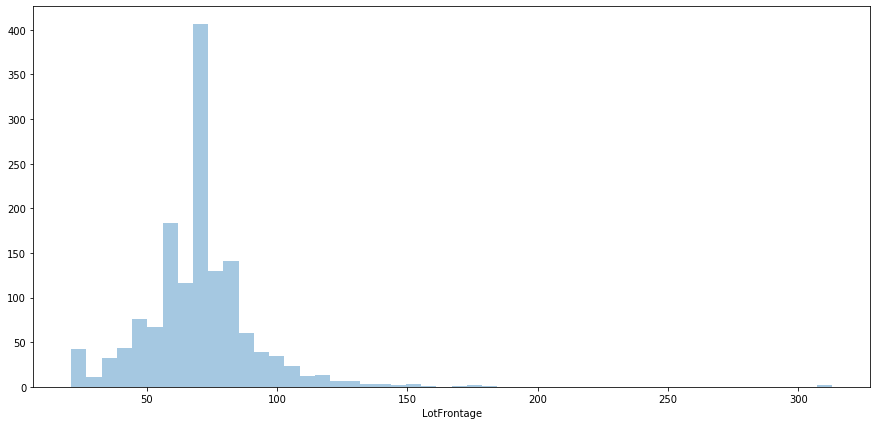

In [38]:
plt.figure(figsize = (15, 7))
sns.distplot(train[lotFrontage], kde = False, bins = 50)

<Figure size 1080x504 with 0 Axes>

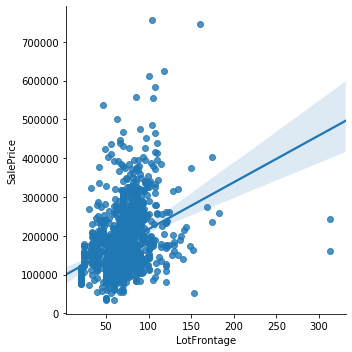

In [40]:
plt.figure(figsize = (15, 7))
sns.lmplot(x = lotFrontage, y = salePrice, data = train)

In [47]:
lotArea = "LotArea"

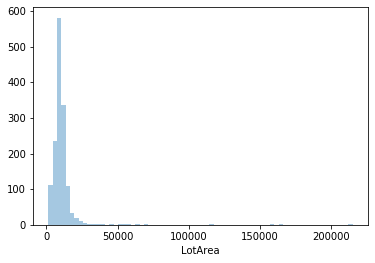

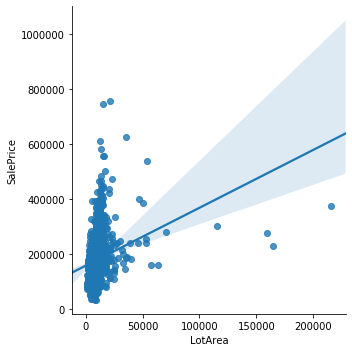

In [57]:
sns.distplot(train[lotArea], kde = False, bins = 70)
sns.lmplot(x = lotArea, y = salePrice, data = train)

In [58]:
numericCols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [67]:
numericCols = numericCols.drop("LotArea")

In [110]:
yearBuilt = "YearBuilt"
yearRemodAdd = "YearRemodAdd"
yearSold = "YrSold"

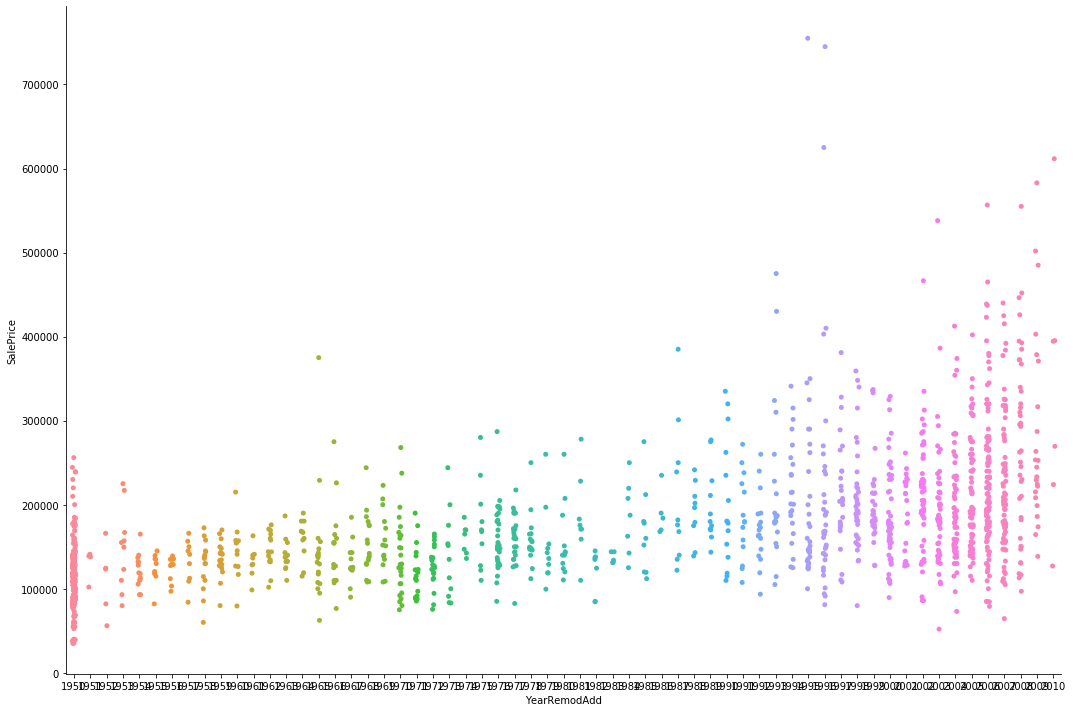

In [113]:
sns.catplot(x = yearRemodAdd, y = salePrice, data = train, height = 10, aspect=1.5)

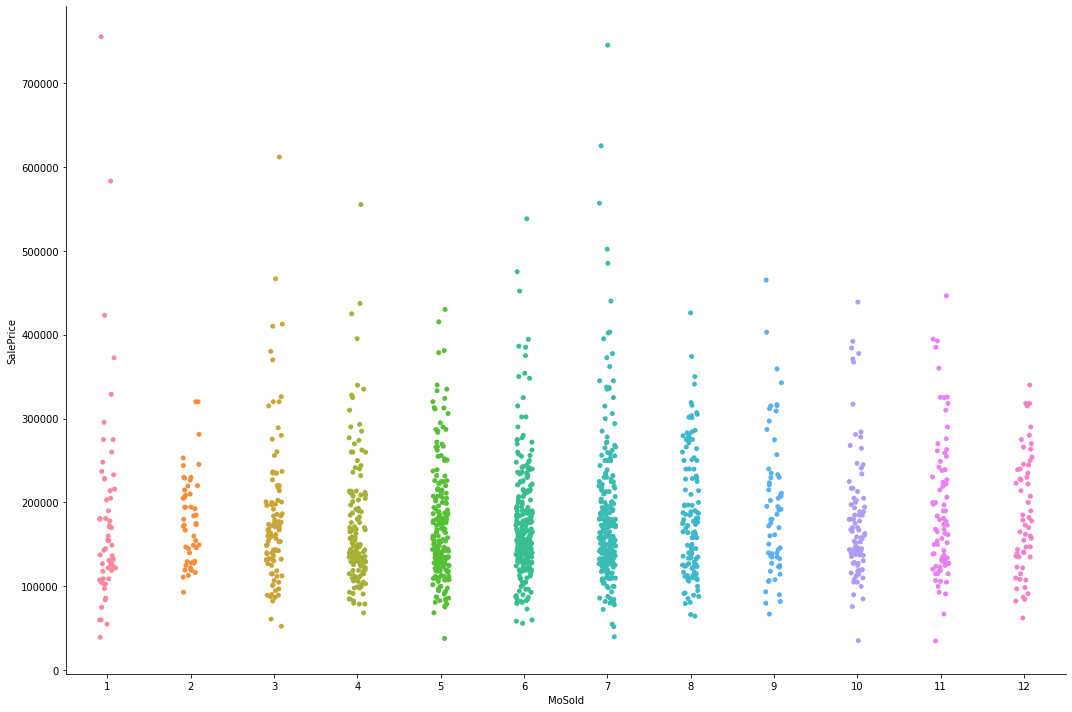

In [181]:
sns.catplot(x = "MoSold", y = salePrice, data = train, height = 10, aspect = 1.5)

In [116]:
numericCols = numericCols.drop(["YearBuilt", "MoSold", "YrSold", "YearRemodAdd"])

In [121]:
train["MasVnrArea"].isnull().sum()

8

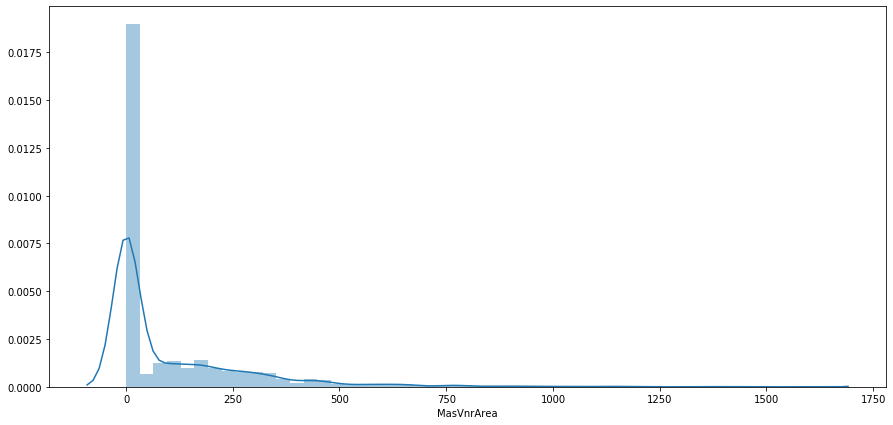

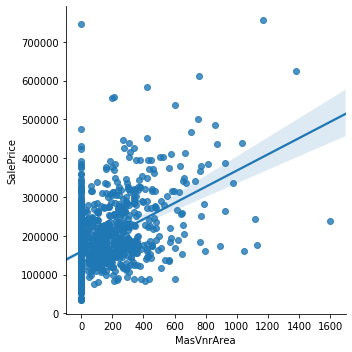

In [124]:
plt.figure(figsize = (15, 7))
sns.distplot(train["MasVnrArea"].dropna())
sns.lmplot(x = "MasVnrArea", y = salePrice, data = train)

In [125]:
masVnrType = "MasVnrType"

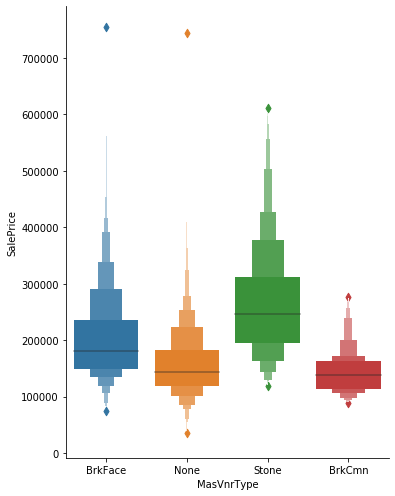

In [128]:
sns.catplot(x = masVnrType, y = salePrice, kind="boxen", data = train, height = 7, aspect = 0.8);

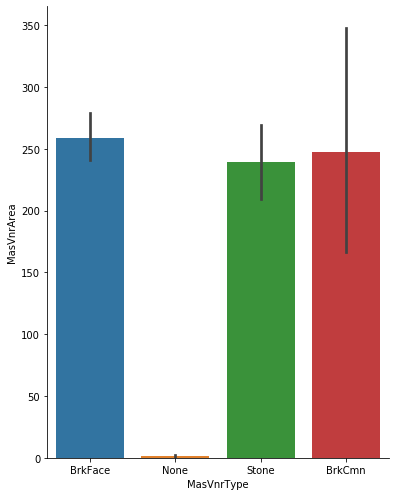

In [130]:
sns.catplot(x = masVnrType, y = "MasVnrArea", kind = "bar", data = train, height = 7, aspect = 0.8);

In [134]:
street = "Street"
alley = "Alley"

In [141]:
train[alley].fillna("NA", inplace = True)

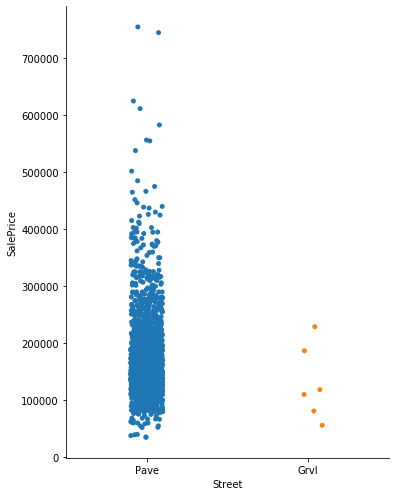

In [152]:
sns.catplot(x = street, y = salePrice, data = train, height = 7, aspect = 0.8)

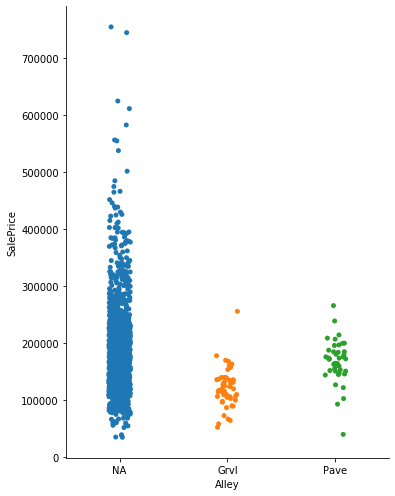

In [151]:
sns.catplot(x = alley, y = salePrice, data = train, height = 7, aspect = 0.8)

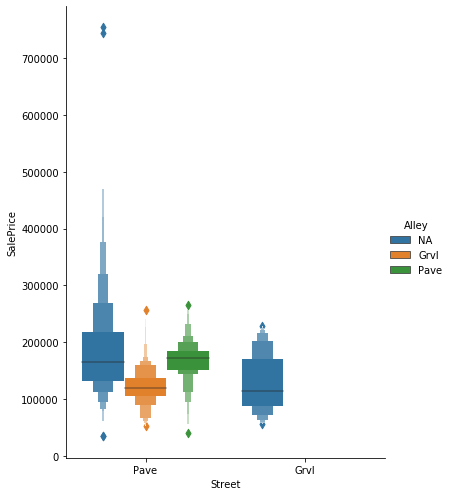

In [144]:
sns.catplot(x = street, y = salePrice, hue = alley, kind="boxen", data = train, height = 7, aspect = 0.8)

In [145]:
lotShape = "LotShape"

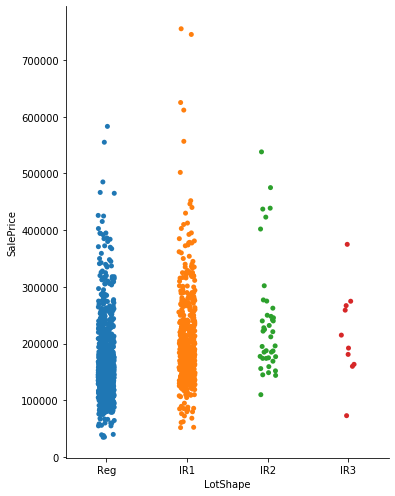

In [150]:
sns.catplot(x = lotShape, y = salePrice, data = train, height = 7, aspect = 0.8)

In [154]:
objCols = objCols.drop([street, alley, lotShape])

In [155]:
landContour = "LandContour"

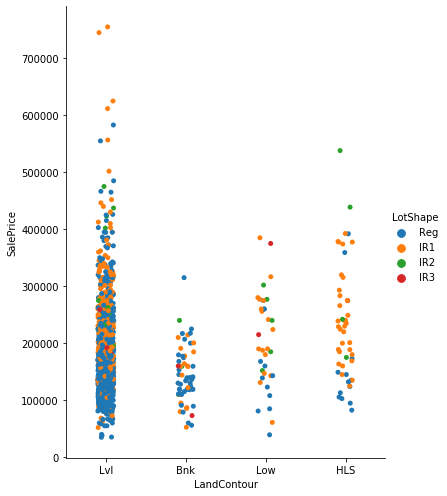

In [157]:
sns.catplot(x = landContour, y = salePrice, hue = lotShape, data = train, height = 7, aspect = 0.8)

In [159]:
utilities = "Utilities"

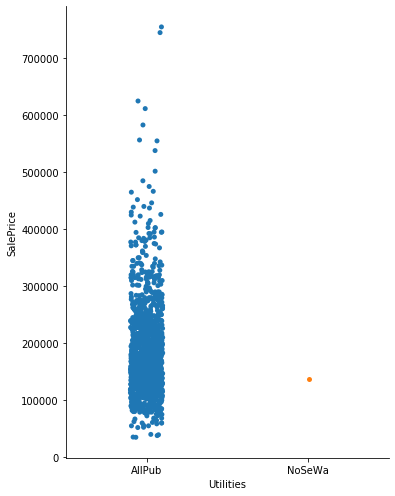

In [160]:
sns.catplot(x = utilities, y = salePrice, data = train, height = 7, aspect = 0.8)

In [169]:
lotConfig = "LotConfig"
landSlope = "LandSlope"

In [166]:
train[lotConfig].isnull().sum()

0

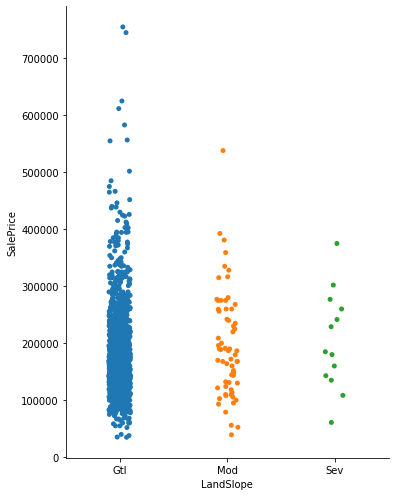

In [174]:
sns.catplot(x = landSlope, y = salePrice, kind = "strip", data = train, height = 7, aspect = 0.8)

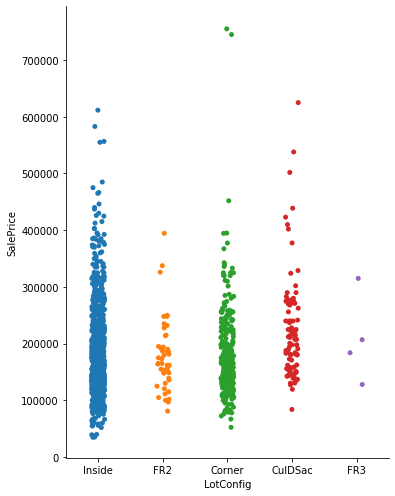

In [175]:
sns.catplot(x = lotConfig, y = salePrice, kind = "strip", data = train, height = 7, aspect = 0.8)

In [176]:
objCols = objCols.drop(landSlope)

In [177]:
neighborhood = "Neighborhood"

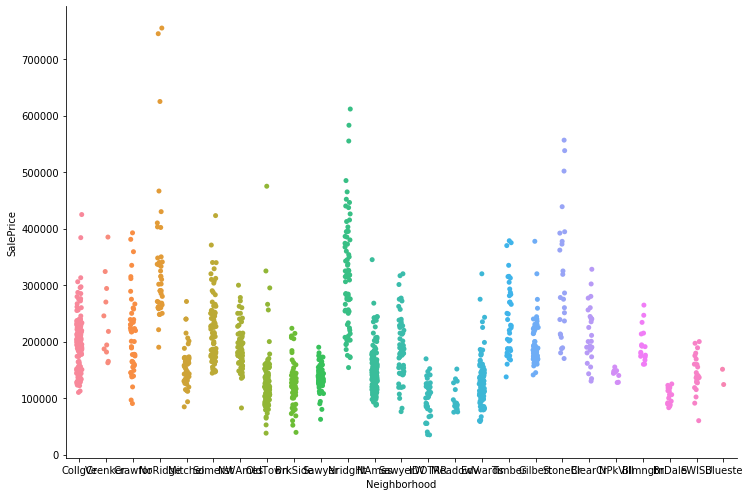

In [180]:
sns.catplot(x = neighborhood, y = salePrice, kind = "strip", data = train, height = 7, aspect = 1.5)

In [182]:
condition1 = "Condition1"
condition2 = "Condition2"

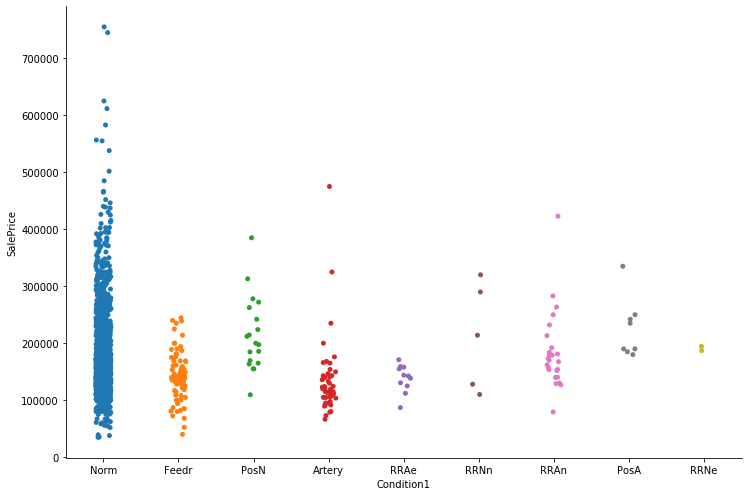

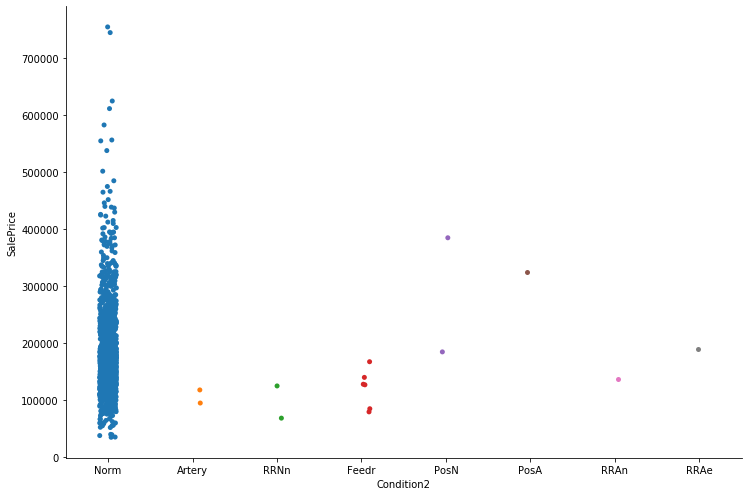

In [187]:
sns.catplot(x = condition1, y = salePrice, kind = "strip", data = train, height = 7, aspect = 1.5)
sns.catplot(x = condition2, y = salePrice, kind = "strip", data = train, height = 7, aspect = 1.5)

In [186]:
objCols = objCols.drop([condition1, condition2])

In [188]:
bldgType = "BldgType"
houseStyle = "HouseStyle"

In [189]:
print(train[bldgType].isnull().sum(), train[houseStyle].isnull().sum())

0 0


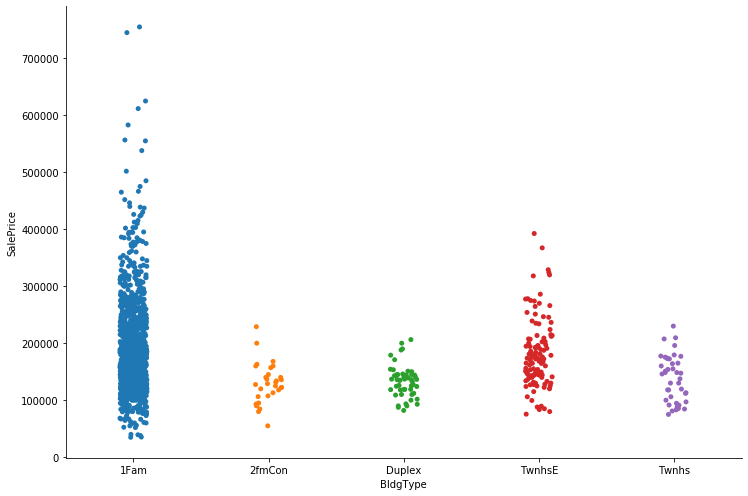

In [190]:
sns.catplot(x = bldgType, y = salePrice, kind = "strip", data = train, height = 7, aspect = 1.5)

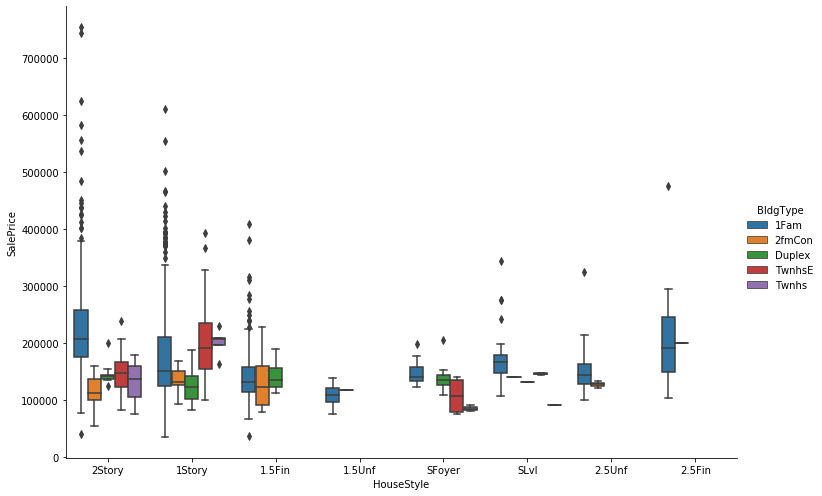

In [192]:
sns.catplot(x = houseStyle, y = salePrice, hue = bldgType, kind = "box", data = train, height = 7, aspect = 1.5)

In [197]:
overallQual = "OverallQual"
overallCond = "OverallCond"

In [198]:
print(train[overallQual].isnull().sum(), train[overallCond].isnull().sum())

0 0


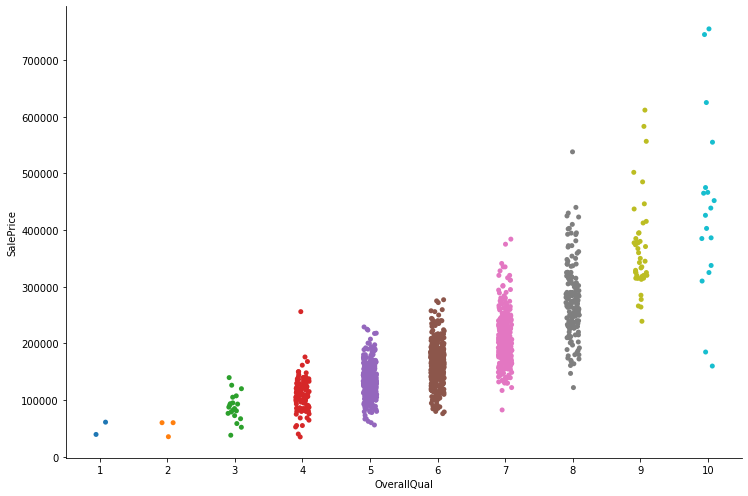

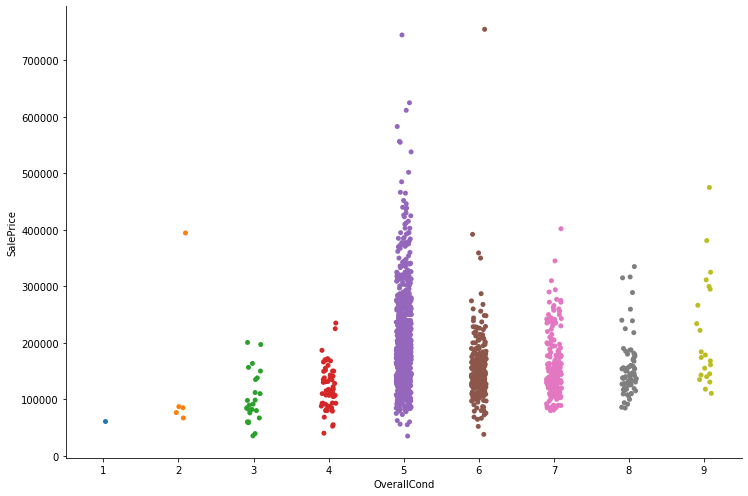

In [199]:
sns.catplot(x = overallQual, y = salePrice, kind = "strip", data = train, height = 7, aspect = 1.5)
sns.catplot(x = overallCond, y = salePrice, kind = "strip", data = train, height = 7, aspect = 1.5)

In [202]:
numericCols = numericCols.drop(overallCond)

In [203]:
roofStyle = "RoofStyle"
roofMatl = "RoofMatl"

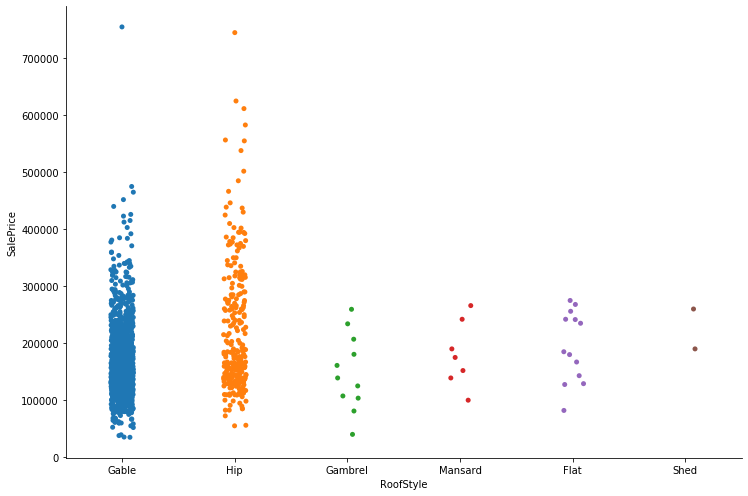

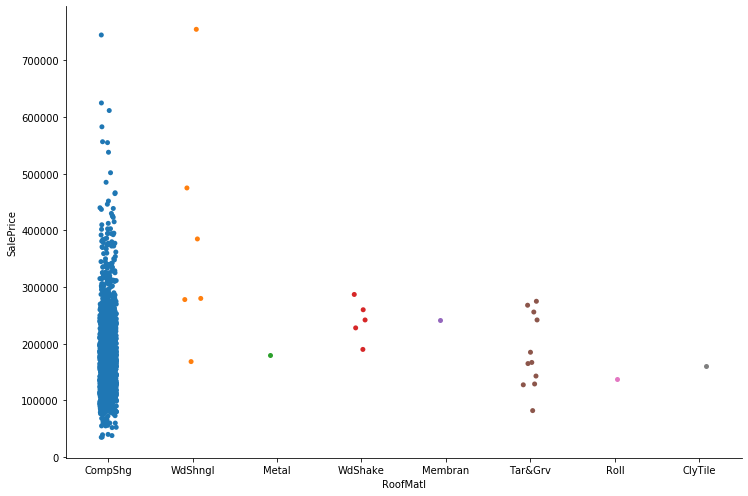

In [204]:
sns.catplot(x = roofStyle, y = salePrice, kind = "strip", data = train, height = 7, aspect = 1.5)
sns.catplot(x = roofMatl, y = salePrice, kind = "strip", data = train, height = 7, aspect = 1.5)

In [205]:
objCols = objCols.drop([roofStyle, roofMatl])

In [206]:
exterior1st = "Exterior1st"
exterior2nd = "Exterior2nd"

In [212]:
list(train[exterior1st].value_counts()[train[exterior1st].value_counts() < 100].index)

['CemntBd',
 'BrkFace',
 'WdShing',
 'Stucco',
 'AsbShng',
 'BrkComm',
 'Stone',
 'ImStucc',
 'CBlock',
 'AsphShn']

In [339]:
train.loc[train[exterior1st].isin(list(train[exterior1st].value_counts()[train[exterior1st].value_counts() < 100].index)), exterior1st] = "Others"

In [340]:
train.loc[train[exterior2nd].isin(list(train[exterior2nd].value_counts()[train[exterior2nd].value_counts() < 100].index)), exterior2nd] = "Others"

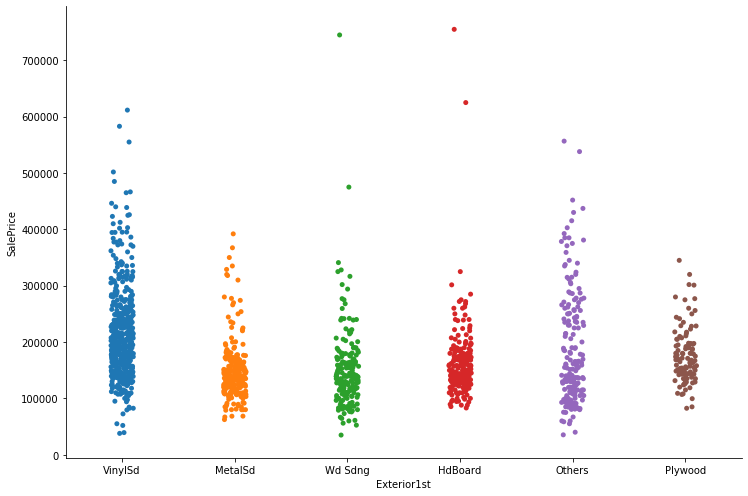

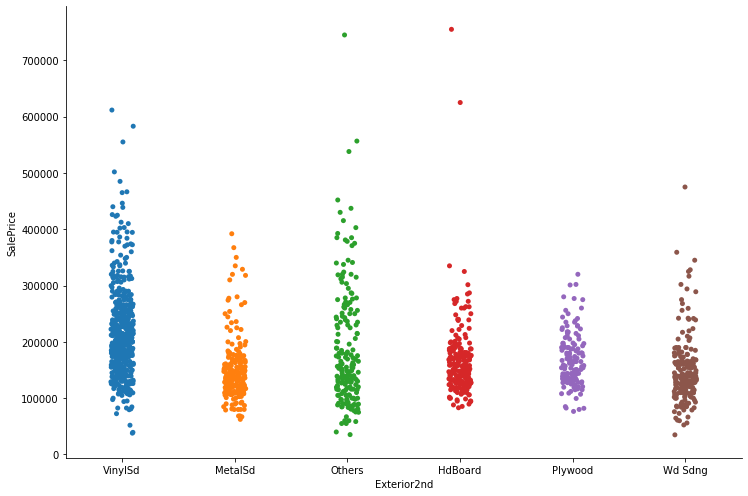

In [240]:
sns.catplot(x = exterior1st, y = salePrice, kind = "strip", data = train, height = 7, aspect = 1.5)
sns.catplot(x = exterior2nd, y = salePrice, kind = "strip", data = train, height = 7, aspect = 1.5)

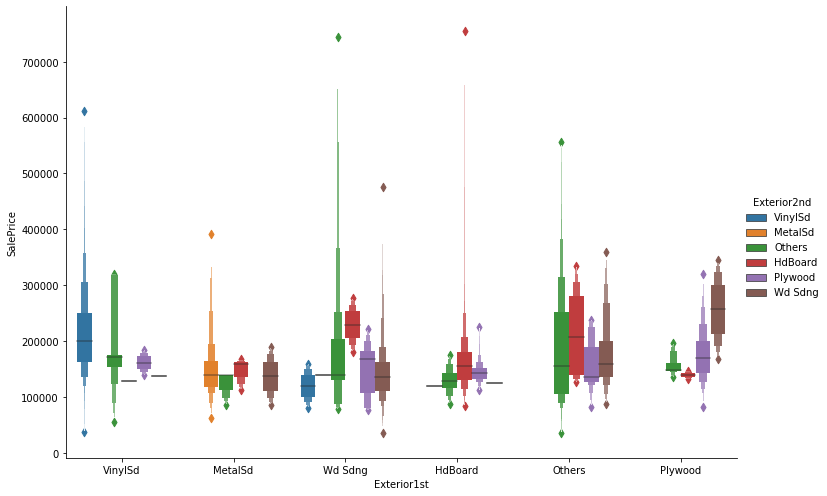

In [241]:
sns.catplot(x = exterior1st, y = salePrice, hue = exterior2nd, kind = "boxen", data = train, height = 7, aspect = 1.5)

In [242]:
exterQual = "ExterQual"
exterCond = "ExterCond"

In [243]:
print(train[exterQual].isnull().sum(), train[exterCond].isnull().sum())

0 0


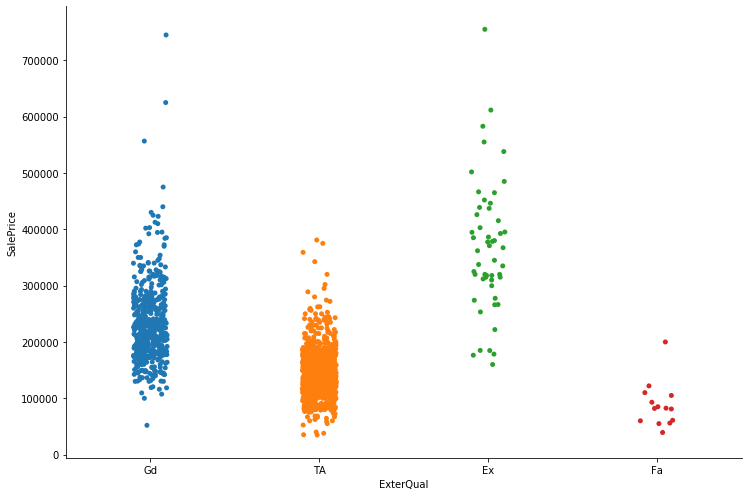

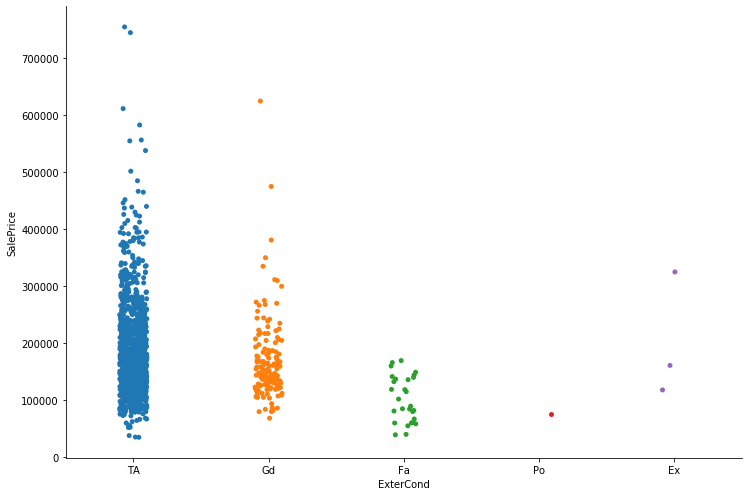

In [244]:
sns.catplot(x = exterQual, y = salePrice, kind = "strip", data = train, height = 7, aspect = 1.5)
sns.catplot(x = exterCond, y = salePrice, kind = "strip", data = train, height = 7, aspect = 1.5)

In [245]:
objCols = objCols.drop([exterQual, exterCond])

In [246]:
foundation = "Foundation"

In [247]:
train[foundation].isnull().sum()

0

In [249]:
train.loc[train[foundation].isin(["Wood", "Slab", "Stone"]), foundation] = "Others"

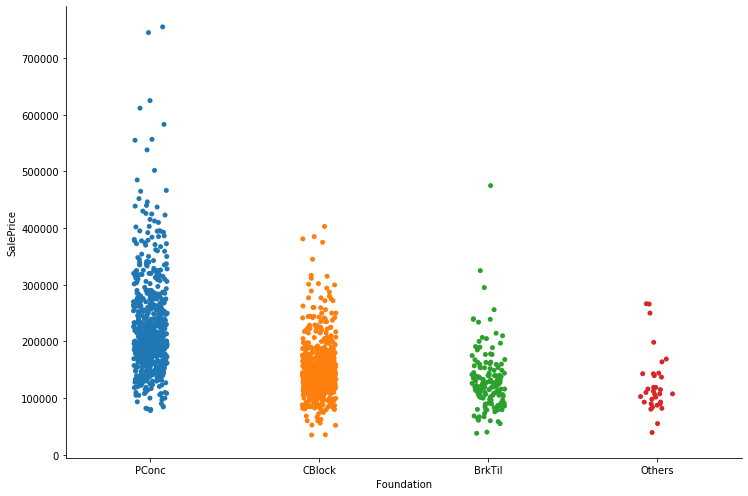

In [250]:
sns.catplot(x = foundation, y = salePrice, kind = "strip", data = train, height = 7, aspect = 1.5)

In [267]:
bsmtQual = "BsmtFinType2"

In [268]:
train[bsmtQual].isnull().sum()

38

In [269]:
train[bsmtQual].fillna("NA", inplace = True)

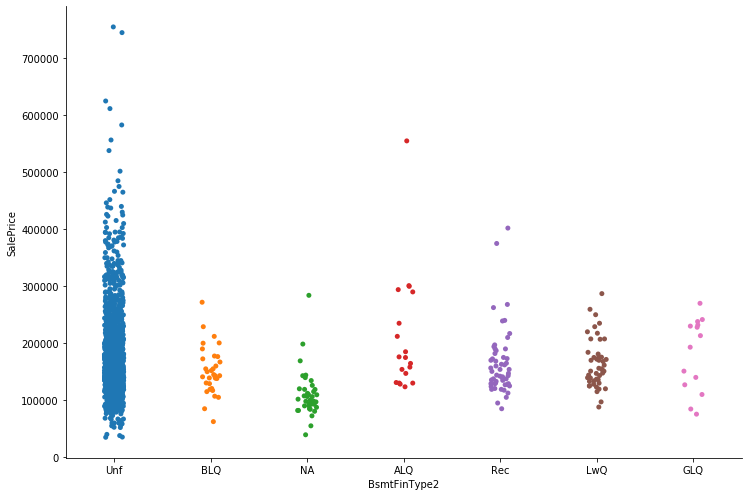

In [270]:
sns.catplot(x = bsmtQual, y = salePrice, kind = "strip", data = train, height = 7, aspect = 1.5)

In [271]:
objCols = objCols.drop(["BsmtCond", "BsmtExposure", "BsmtFinType2"])

In [320]:
heating = "SaleCondition"

In [321]:
train[heating].fillna("NA", inplace = True)

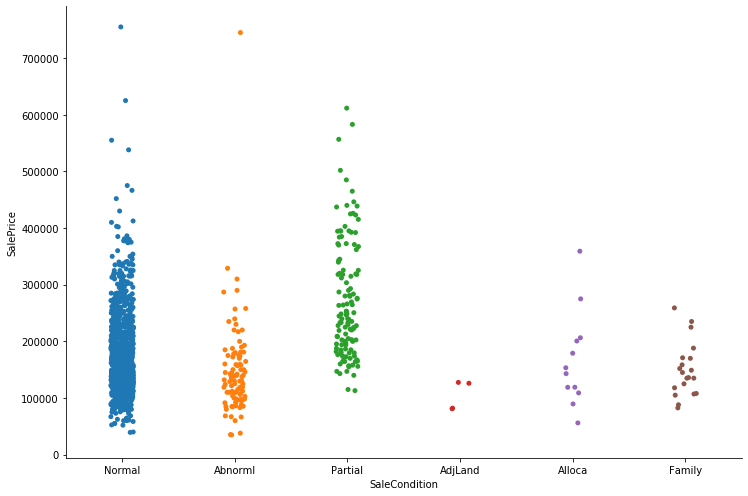

In [322]:
sns.catplot(x = heating, y = salePrice, kind = "strip", data = train, height = 7, aspect = 1.5)

In [325]:
objCols = objCols.drop(["Heating", "Electrical", "Functional", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition"])

In [326]:
numericCols = numericCols.drop("GarageYrBlt")

In [327]:
numericCols

Index(['LotFrontage', 'OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [328]:
objCols

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtQual',
       'BsmtFinType1', 'HeatingQC', 'CentralAir', 'KitchenQual', 'GarageType',
       'GarageFinish', 'PavedDrive'],
      dtype='object')

In [350]:
train.fillna("NA", inplace = True)

In [367]:
test.fillna("NA", inplace = True)

In [337]:
train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA', 'NA', 'RFn', 'Unf',
       'P', 'Y'],
      dtype='object', length=125)

In [355]:
for item in train.columns:
    if (item not in objCols) and (item not in numericCols):
        train.drop(item, axis = 1, inplace = True)

In [368]:
for item in test.columns:
    if (item not in objCols) and (item not in numericCols):
        test.drop(item, axis = 1, inplace = True)

In [356]:
for item in list(objCols):
    newCols = pd.get_dummies(train[item], drop_first=True, prefix = item)
    train = pd.concat([train, newCols], axis = 1)
    train.drop([item], axis = 1, inplace = True)

In [369]:
for item in list(objCols):
    newCols = pd.get_dummies(test[item], drop_first=True, prefix = item)
    test = pd.concat([test, newCols], axis = 1)
    test.drop([item], axis = 1, inplace = True)

### Train test split

In [357]:
dumpTrain = pd.read_csv("Dataset/train.csv")

In [358]:
from sklearn.model_selection import train_test_split

In [359]:
X = train
y = dumpTrain[salePrice]

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Train

In [361]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [362]:
predictions = lm.predict(X_test)

In [363]:
from sklearn import metrics

In [364]:
print(metrics.mean_absolute_error(y_test, predictions),
     metrics.mean_squared_error(y_test, predictions),
     np.sqrt(metrics.mean_squared_error(y_test, predictions)))

654383.0836601156 88504963266910.53 9407707.652075002


In [370]:
predictions = lm.predict(test)

ValueError: could not convert string to float: 'NA'

In [372]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 137 entries, LotFrontage to PavedDrive_Y
dtypes: float64(1), int64(18), object(8), uint8(110)
memory usage: 464.6+ KB


### Clean test data

In [373]:
test = pd.read_csv("Dataset/test.csv")

In [385]:
test_numericCols = test.select_dtypes(include = ["int64", "float64"]).columns

In [390]:
test_numericCols = test_numericCols.drop("Id")

In [394]:
test[list(test_numericCols)].fillna(test[list(test_numericCols)].mean(), inplace = True)

C:\Users\nhannn\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [380]:
test["GarageCars"].fillna(test["GarageCars"].mean(), inplace = True)